In [43]:
import numpy as np
import pandas as pd
from env import get_connection
from acquire import wrangle_zillow
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
#getting the data
zillow = wrangle_zillow()
zillow.head()

/Users/andy.jensen/codeup-data-science/clustering-exercises/acquire.py:14: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('zillow.csv')


,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
#initial shape
zillow.shape

(77579, 69)

In [4]:
#sorting the transaction date desc
zillow=zillow.sort_values(by= ['transactiondate'], ascending=False)
zillow.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
77578,12826780,NaN,NaN,261.0,2.0,NaN,NaN,NaN,1187175,NaN,...,77612,0.007204,2017-09-25,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77577,12773139,NaN,NaN,261.0,2.0,NaN,NaN,1.0,1843709,NaN,...,77611,0.037129,2017-09-21,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
77576,17239384,NaN,NaN,261.0,NaN,NaN,NaN,NaN,2968375,NaN,...,77610,0.013209,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77575,11000655,NaN,NaN,261.0,2.0,NaN,NaN,NaN,673515,NaN,...,77609,0.020615,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77574,10833991,NaN,NaN,266.0,2.0,NaN,NaN,1.0,2864704,NaN,...,77608,-0.002245,2017-09-20,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [5]:
#removing duplicate sales and keeping the most recent sale
zillow= zillow[zillow.duplicated(subset=['parcelid'], keep='first')==False]

# Data Summary

In [6]:
#shape
zillow.shape

(77381, 69)

In [7]:
#summary stats distributions, value_counts
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
id,77381.0,1.495139e+06,8.609071e+05,3.490000e+02,7.520700e+05,1.497932e+06,2.240535e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


In [8]:
#info for nulls
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 77578 to 0
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [9]:
#value counts
pd.options.display.max_rows = 999
zillow.dtypes

parcelid                          int64
typeconstructiontypeid          float64
storytypeid                     float64
propertylandusetypeid           float64
heatingorsystemtypeid           float64
buildingclasstypeid             float64
architecturalstyletypeid        float64
airconditioningtypeid           float64
id                                int64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64


parcelid


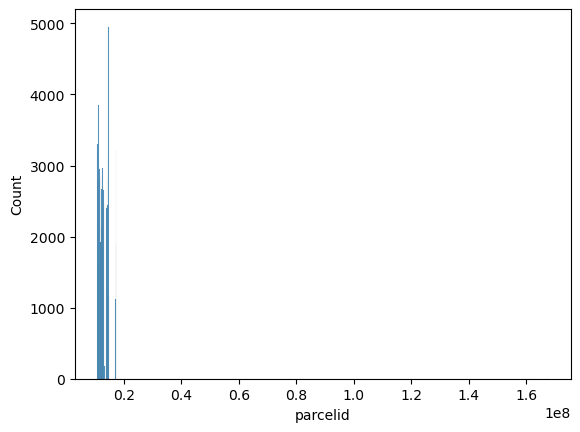

typeconstructiontypeid


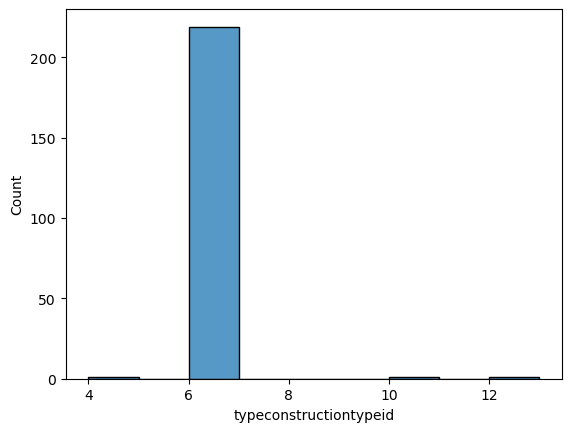

storytypeid


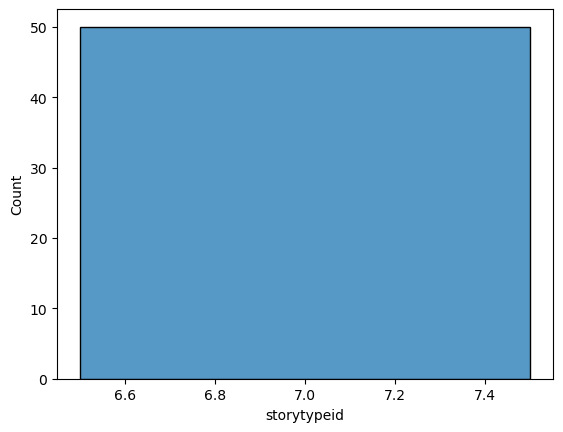

propertylandusetypeid


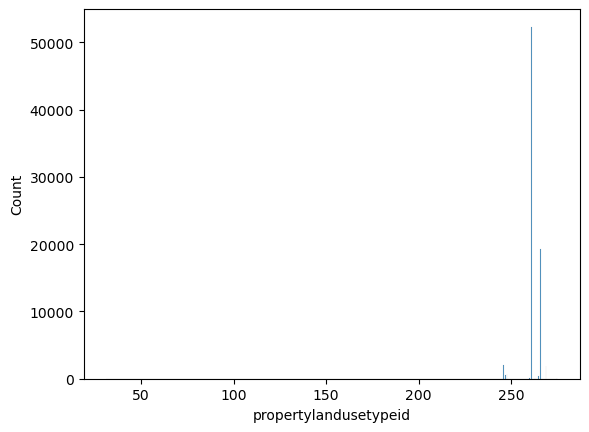

heatingorsystemtypeid


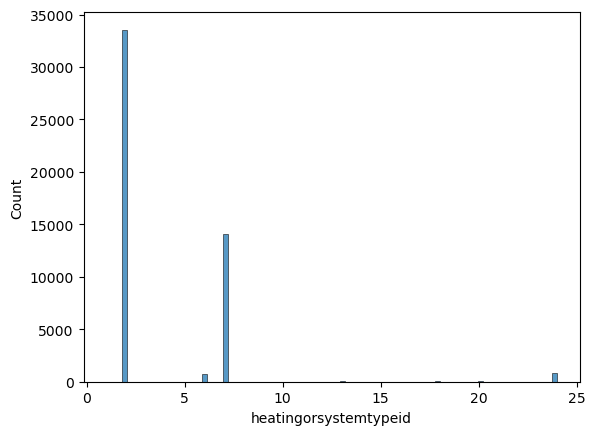

buildingclasstypeid


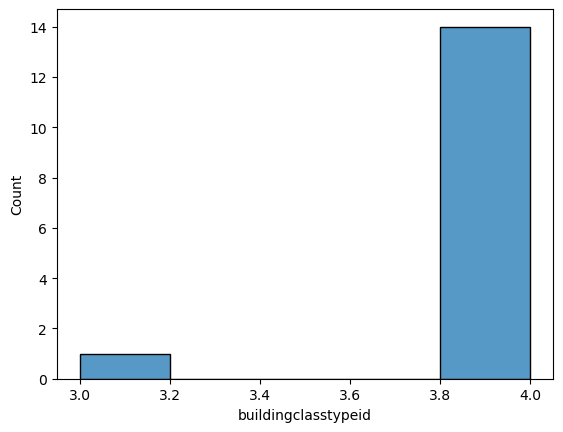

architecturalstyletypeid


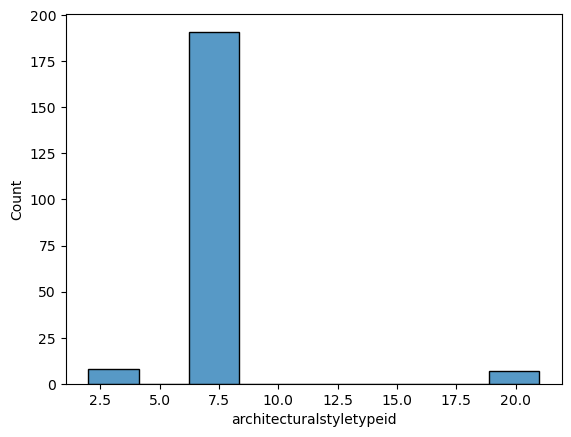

airconditioningtypeid


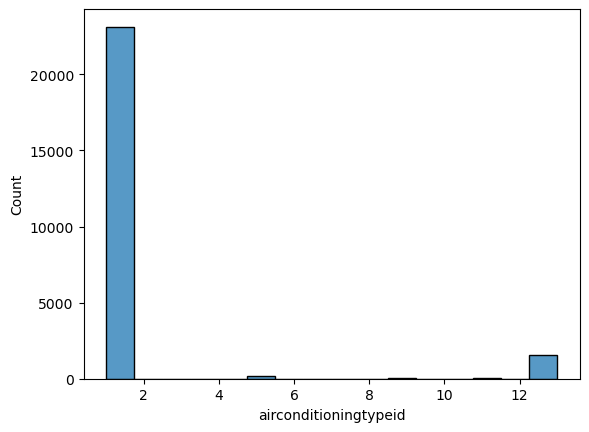

id


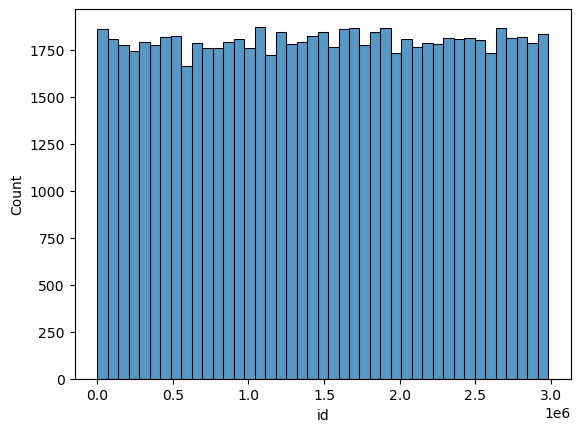

basementsqft


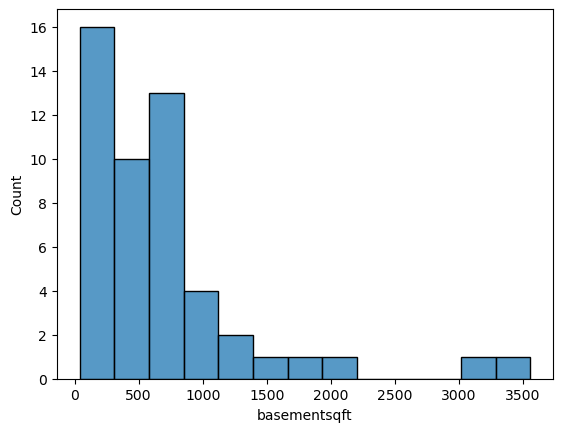

bathroomcnt


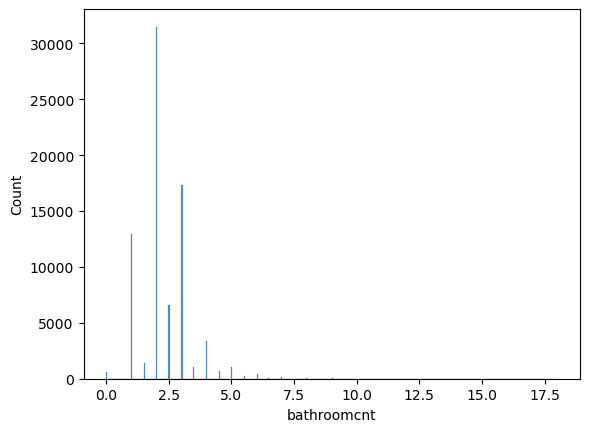

bedroomcnt


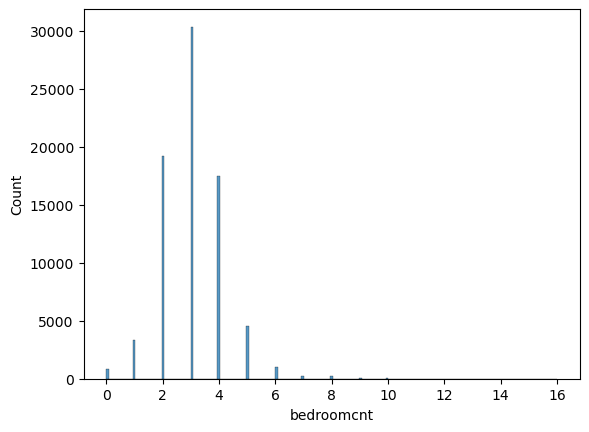

buildingqualitytypeid


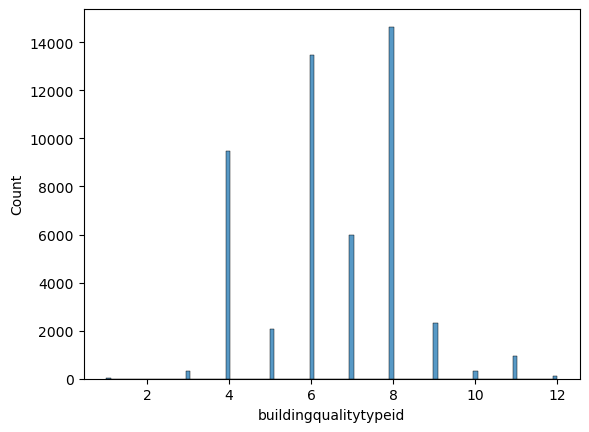

calculatedbathnbr


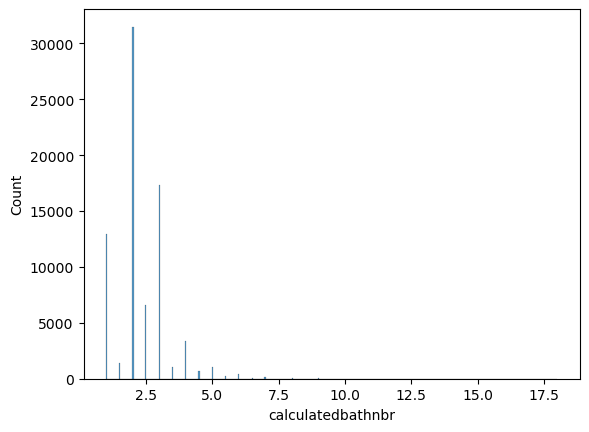

decktypeid


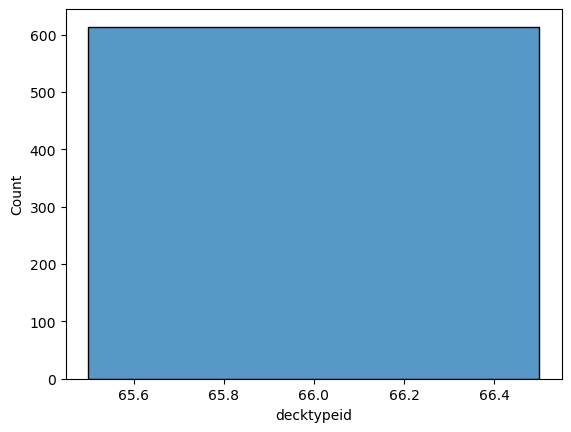

finishedfloor1squarefeet


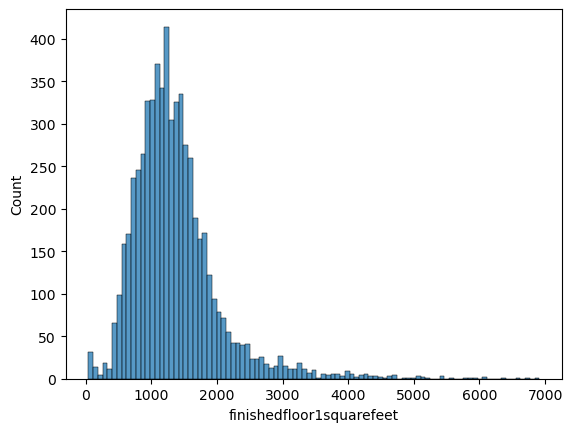

calculatedfinishedsquarefeet


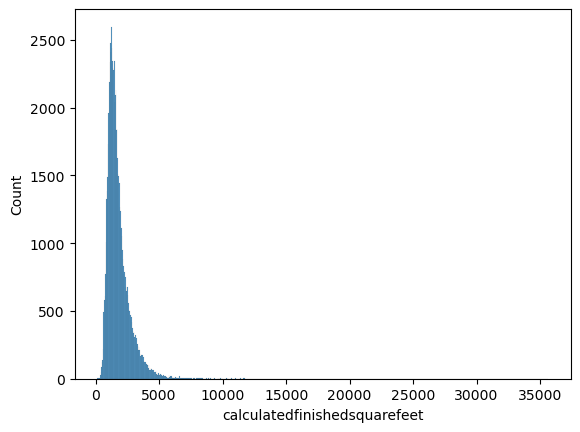

finishedsquarefeet12


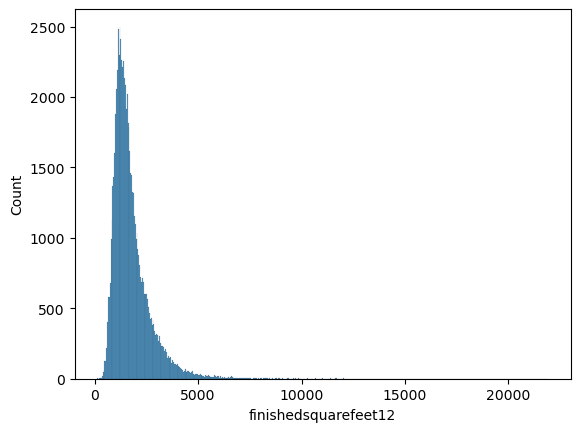

finishedsquarefeet13


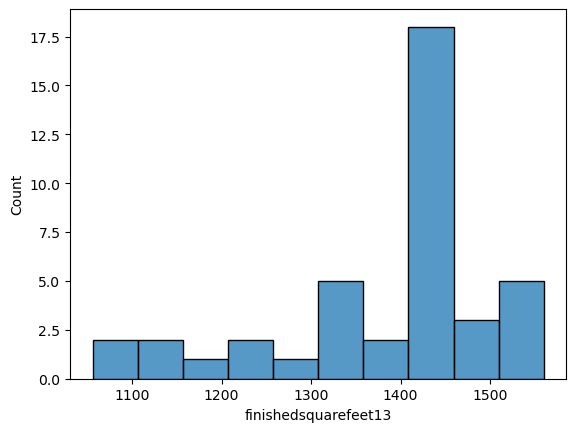

finishedsquarefeet15


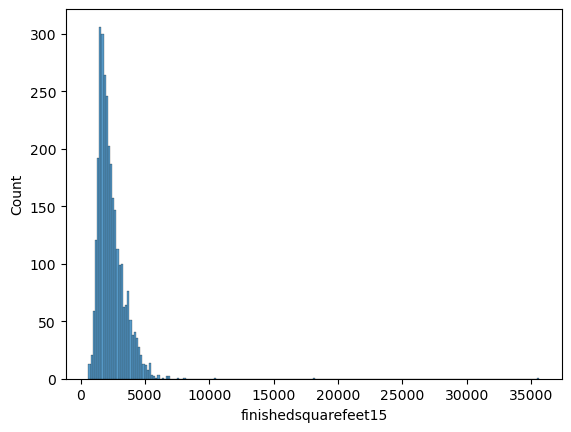

finishedsquarefeet50


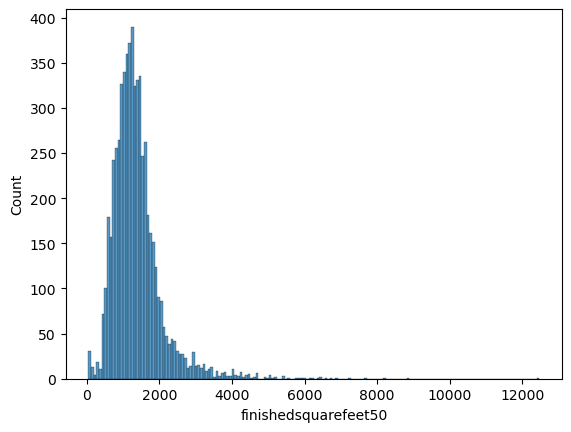

finishedsquarefeet6


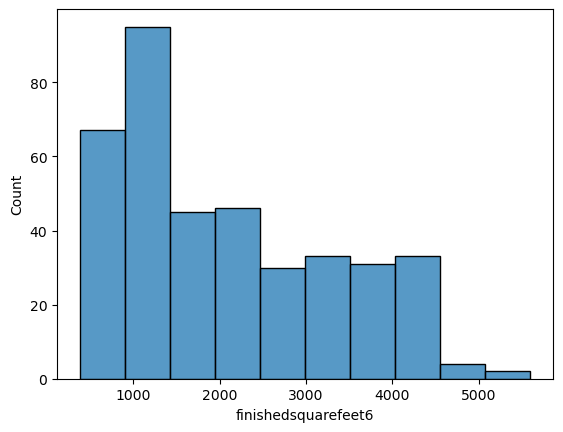

fips


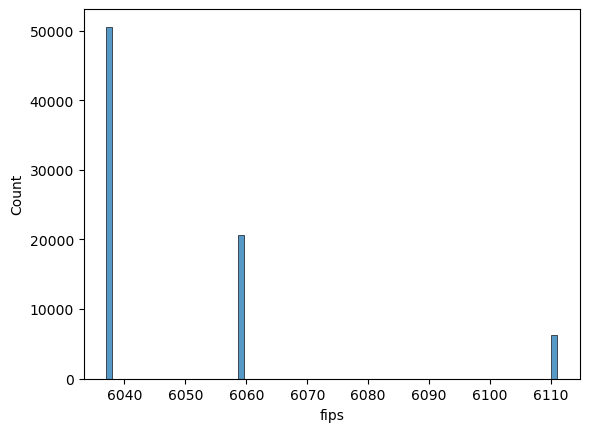

fireplacecnt


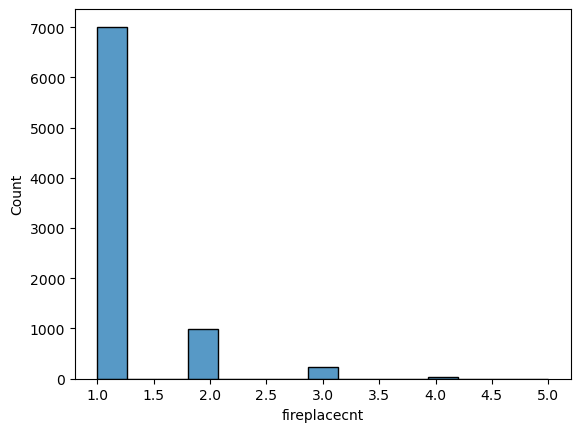

fullbathcnt


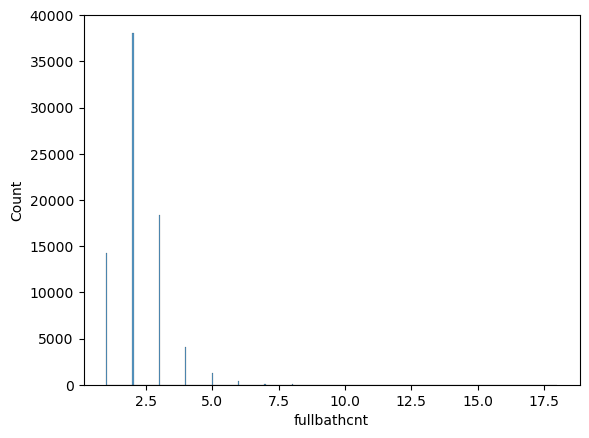

garagecarcnt


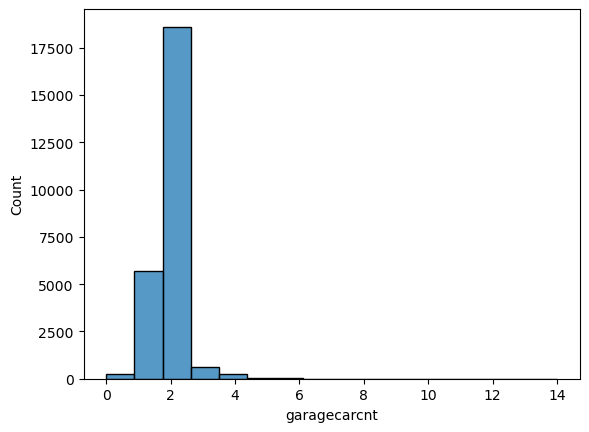

garagetotalsqft


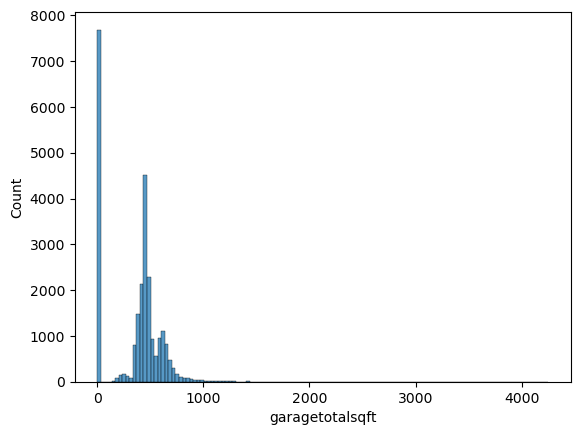

hashottuborspa


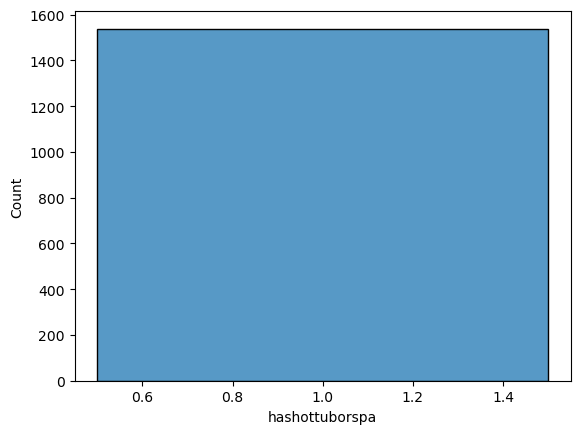

latitude


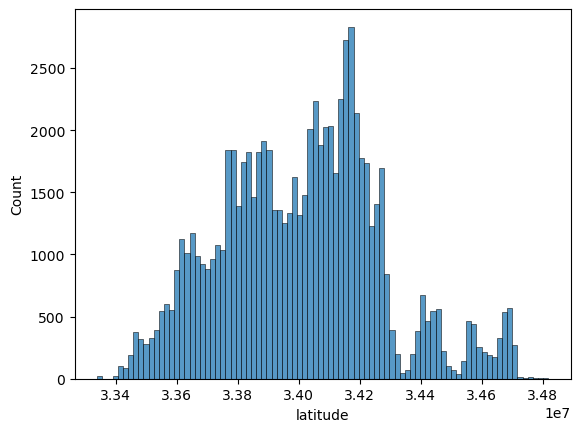

longitude


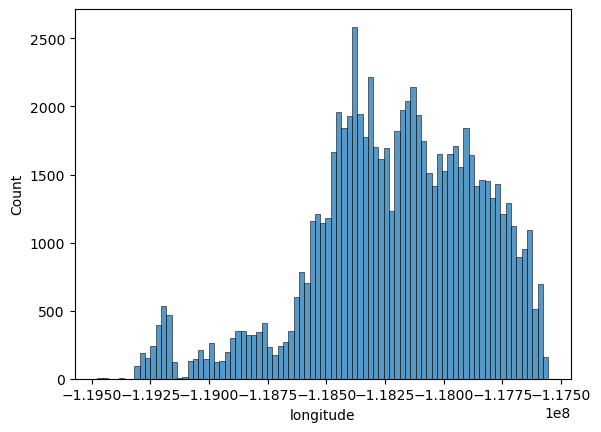

lotsizesquarefeet


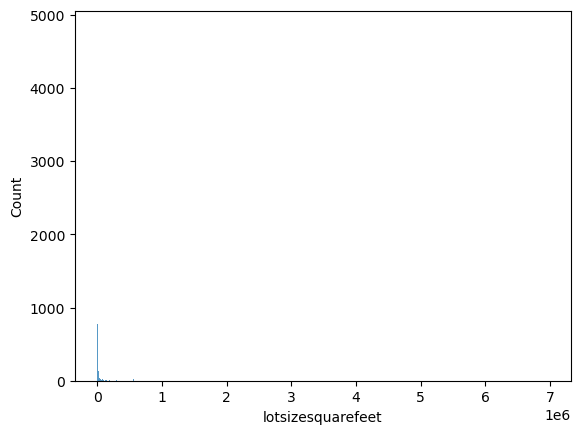

poolcnt


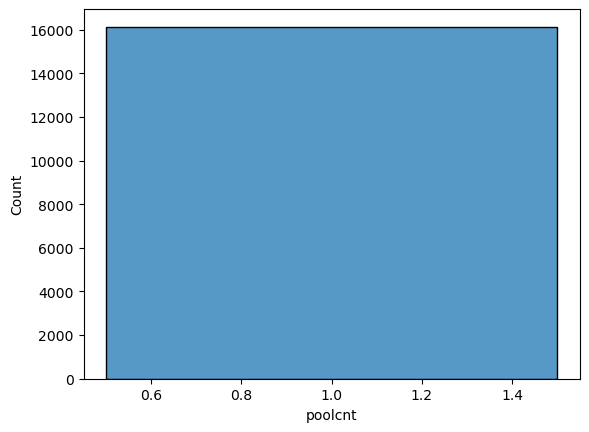

poolsizesum


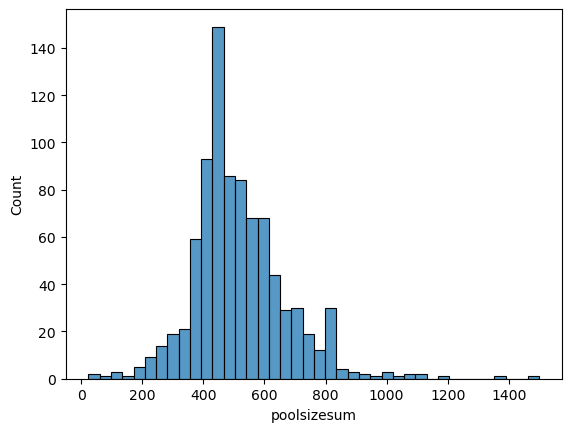

pooltypeid10


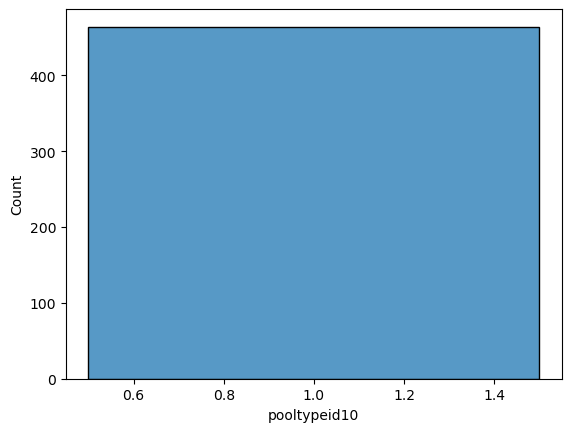

pooltypeid2


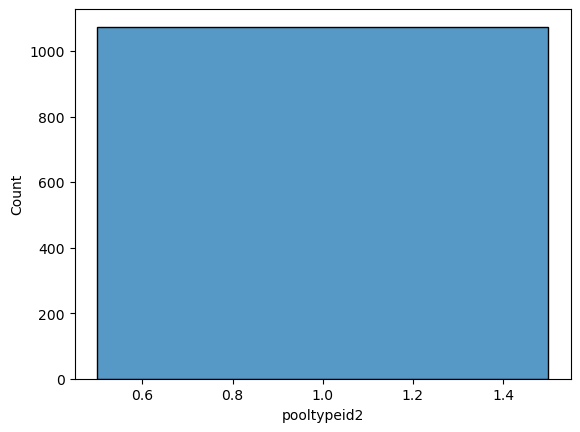

pooltypeid7


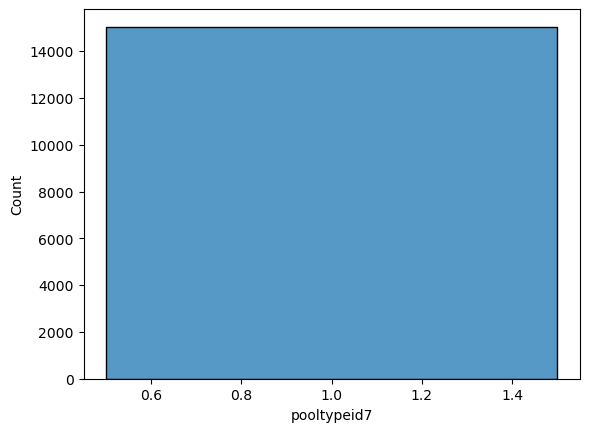

propertycountylandusecode


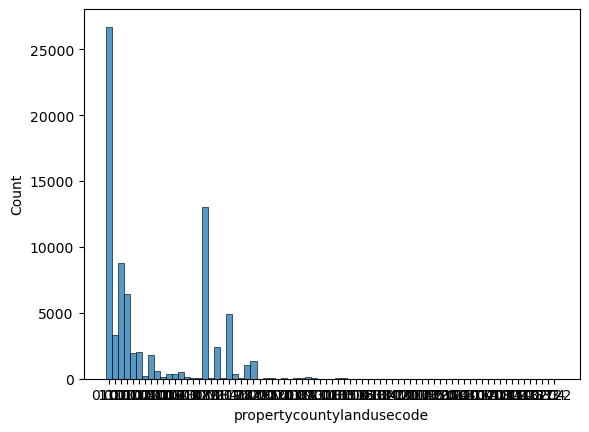

propertyzoningdesc


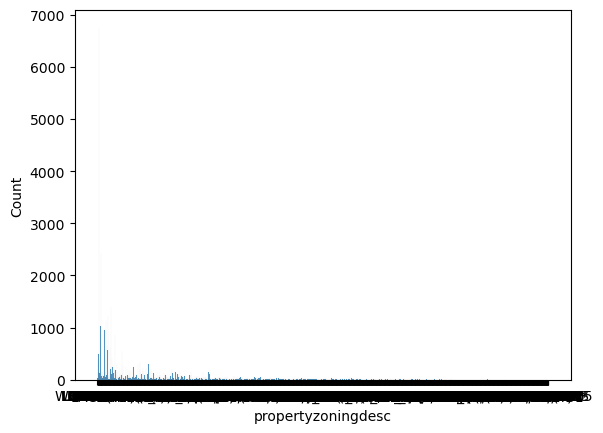

rawcensustractandblock


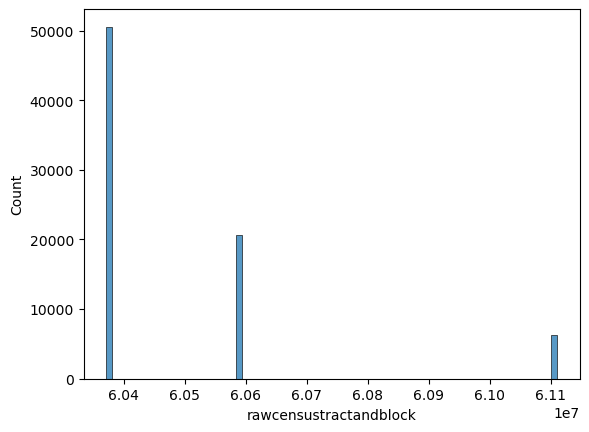

regionidcity


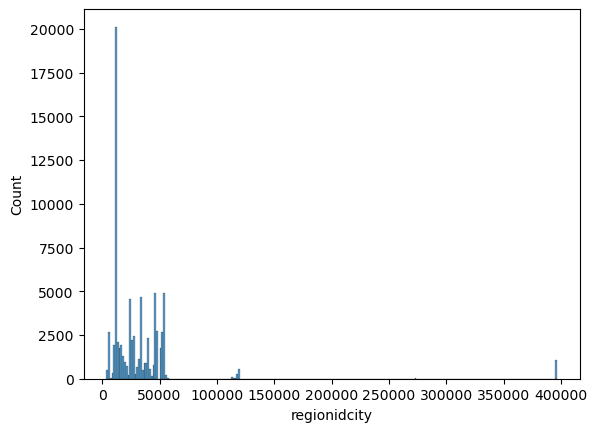

regionidcounty


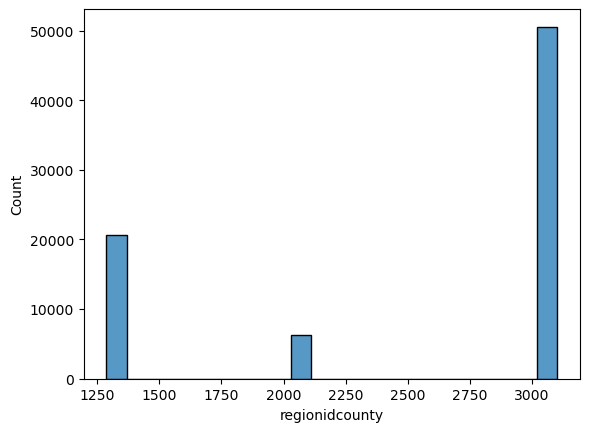

regionidneighborhood


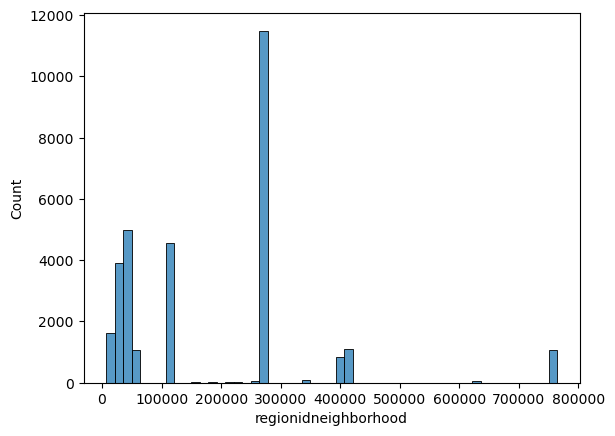

regionidzip


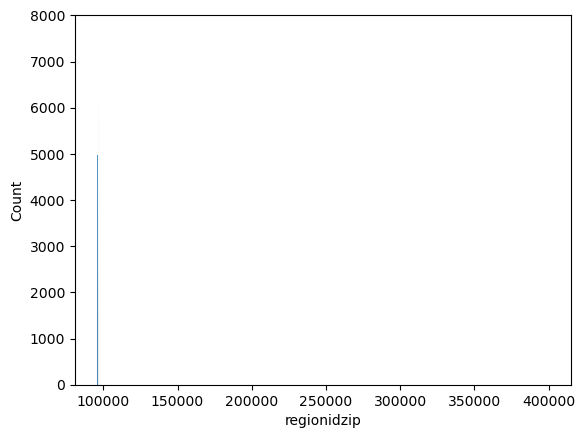

roomcnt


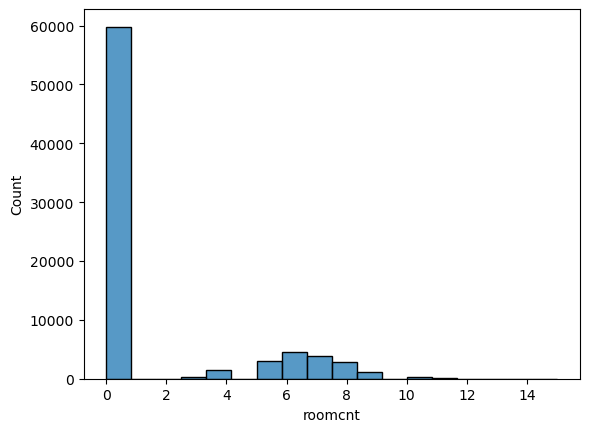

threequarterbathnbr


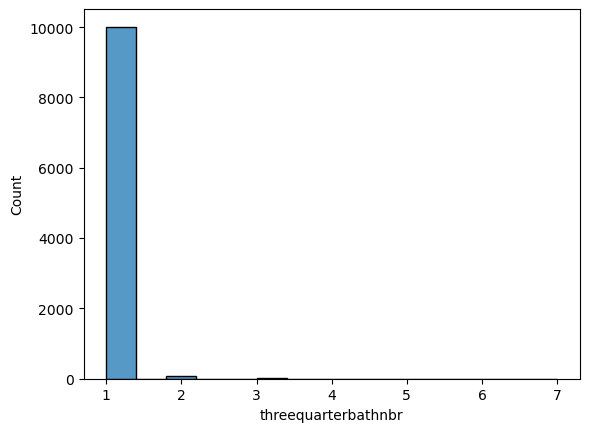

unitcnt


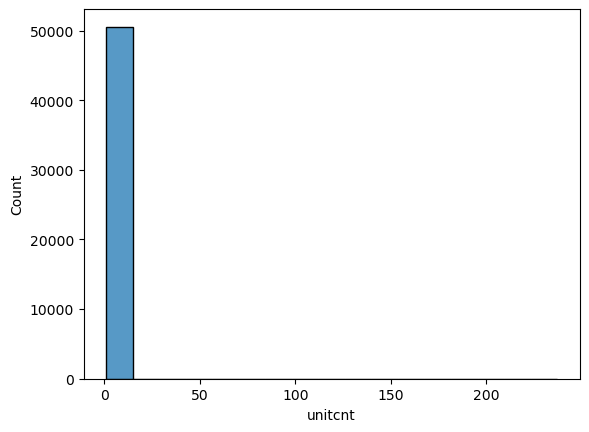

yardbuildingsqft17


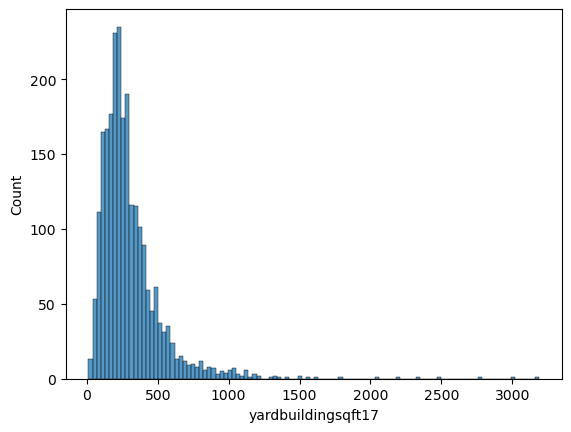

yardbuildingsqft26


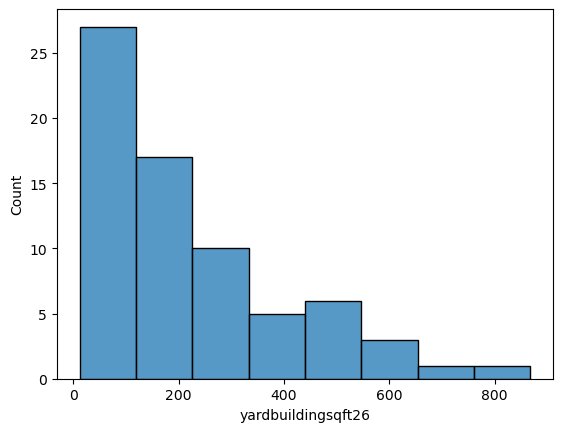

yearbuilt


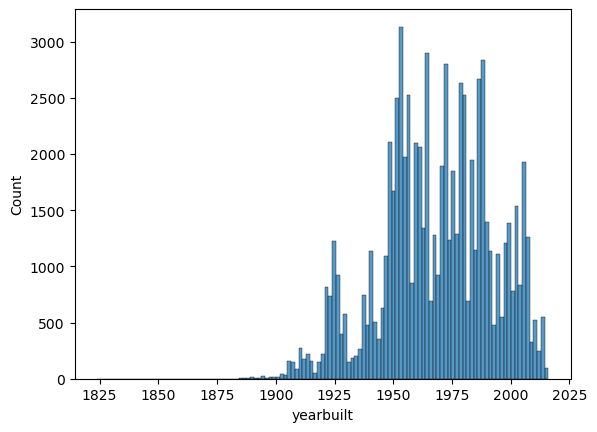

numberofstories


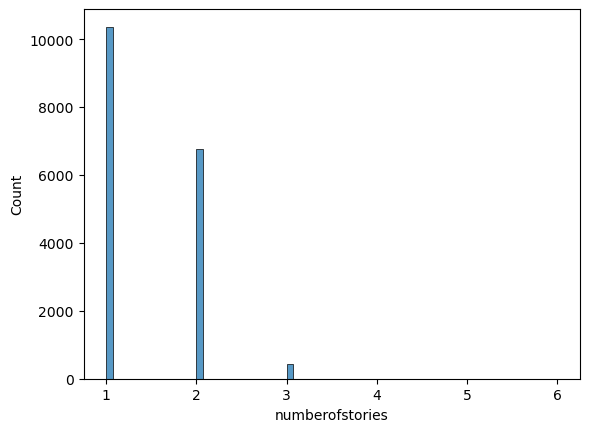

fireplaceflag


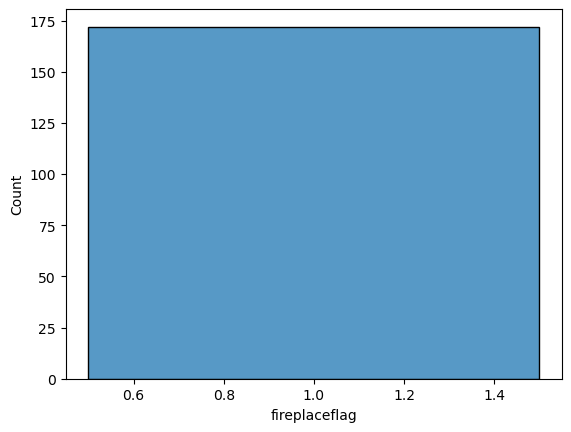

structuretaxvaluedollarcnt


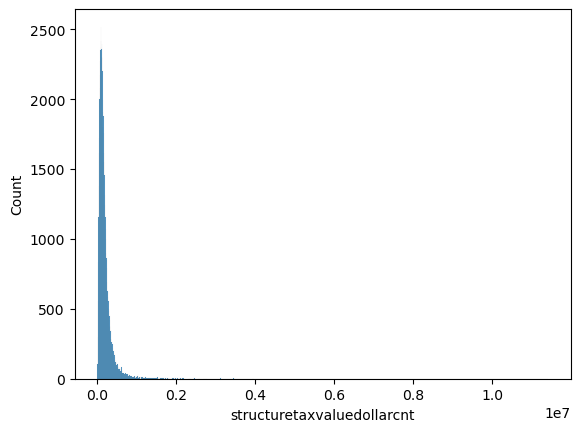

taxvaluedollarcnt


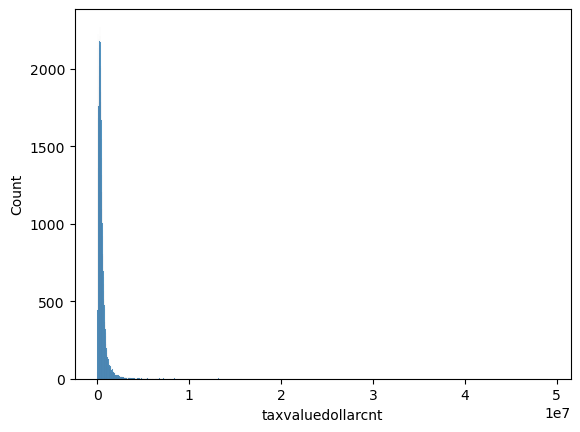

assessmentyear


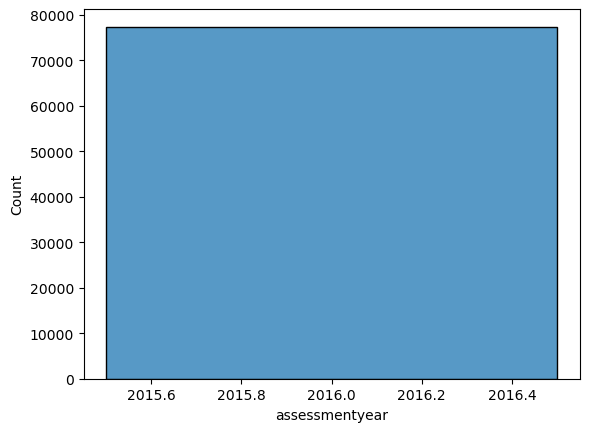

landtaxvaluedollarcnt


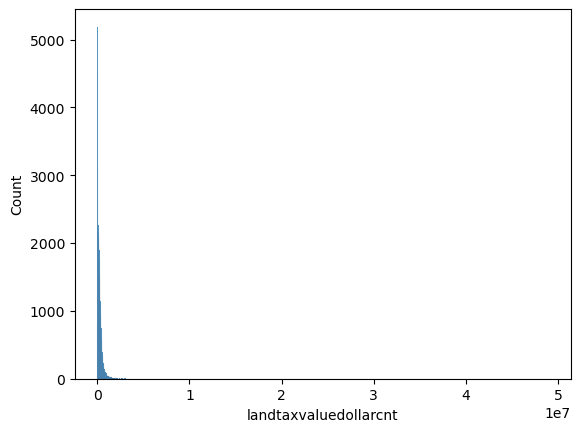

taxamount


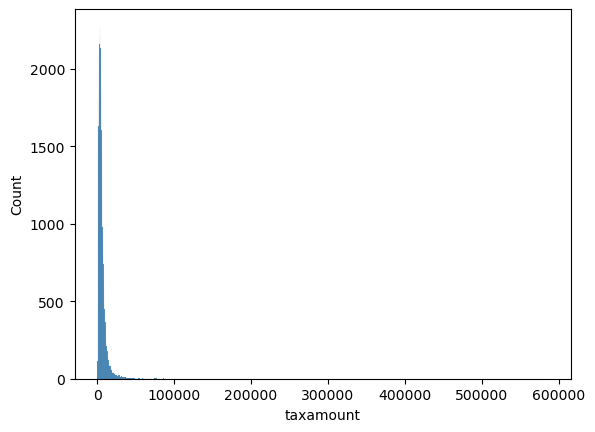

taxdelinquencyflag


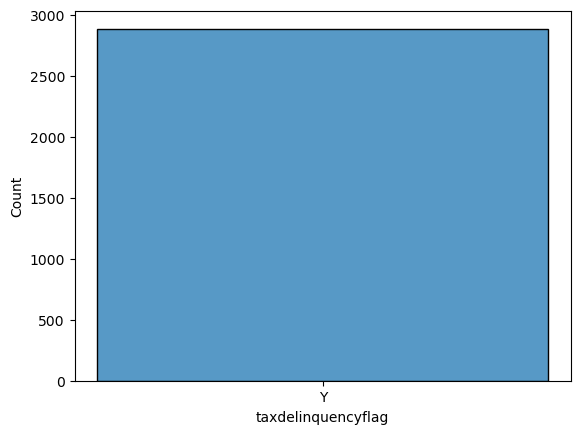

taxdelinquencyyear


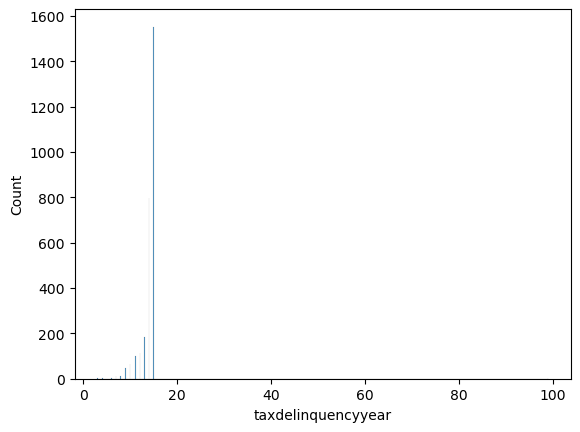

censustractandblock


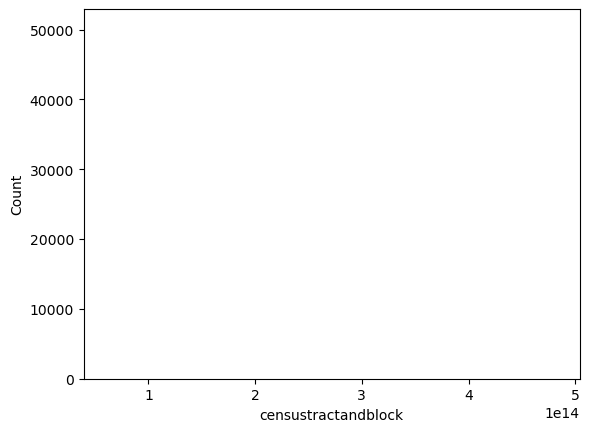

id.1


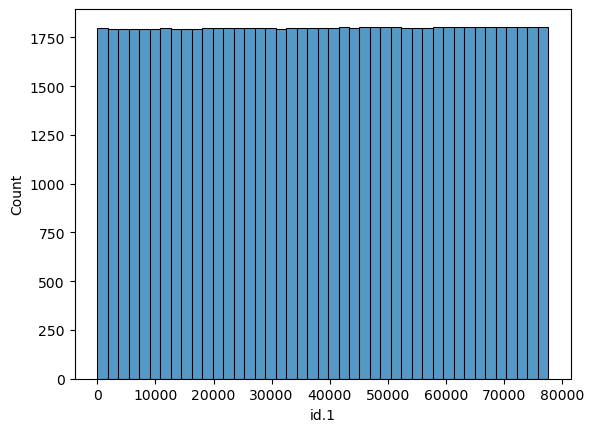

logerror


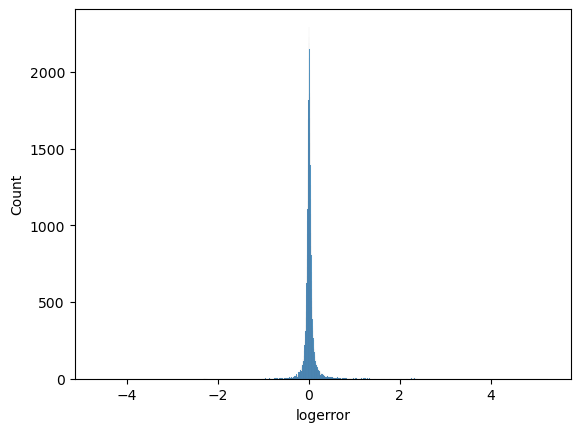

transactiondate


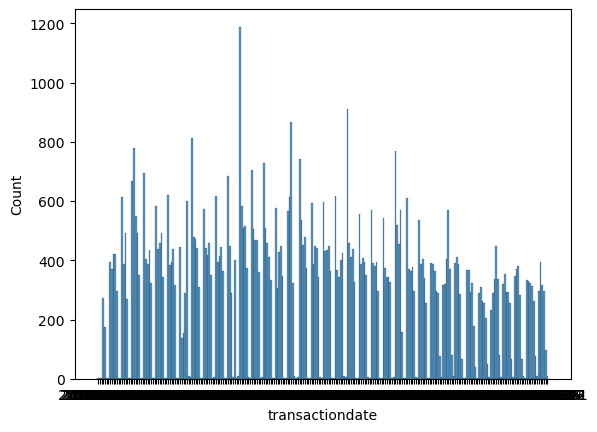

airconditioningdesc


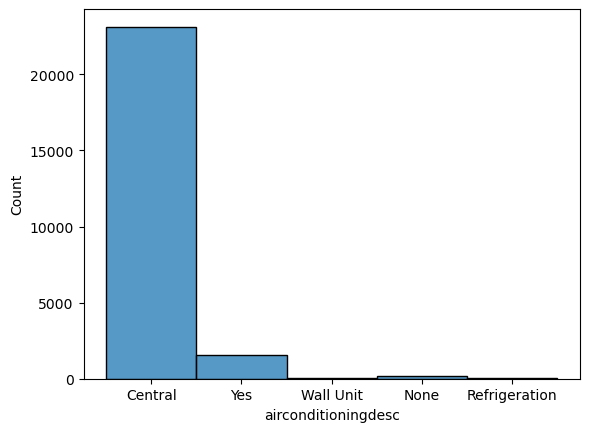

architecturalstyledesc


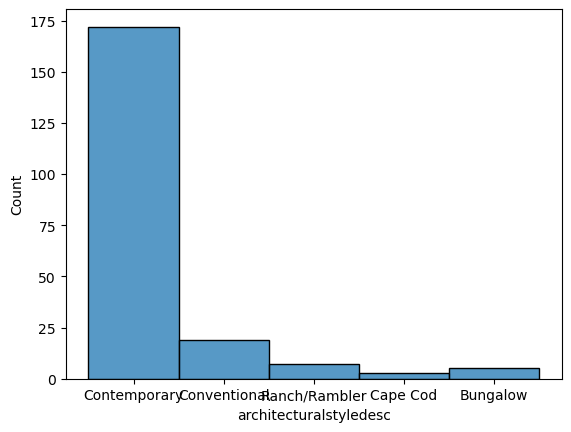

buildingclassdesc


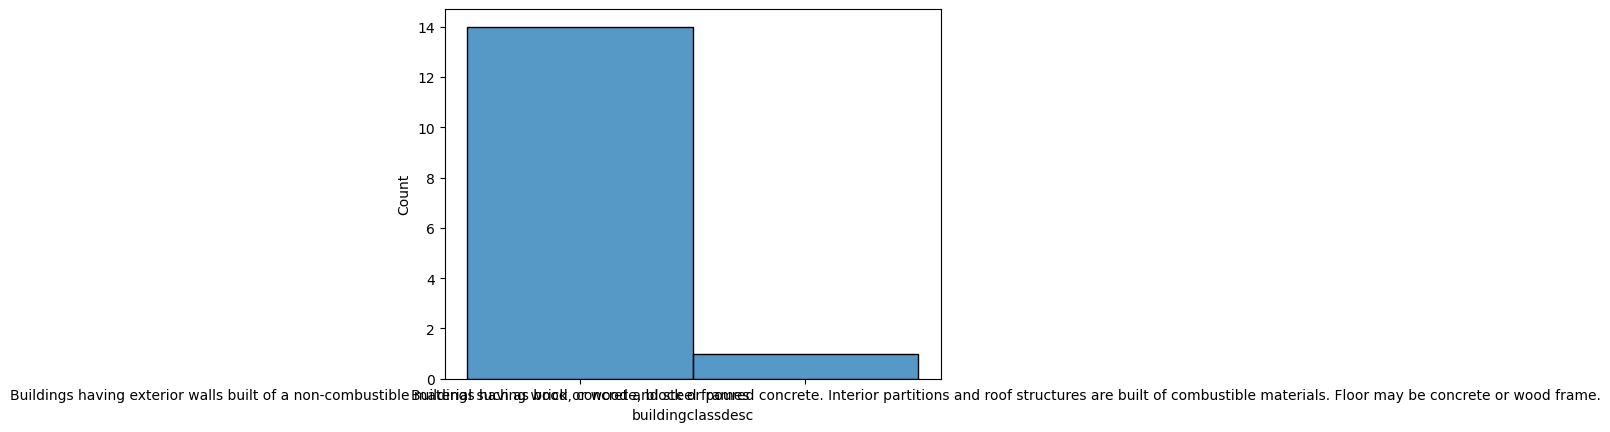

heatingorsystemdesc


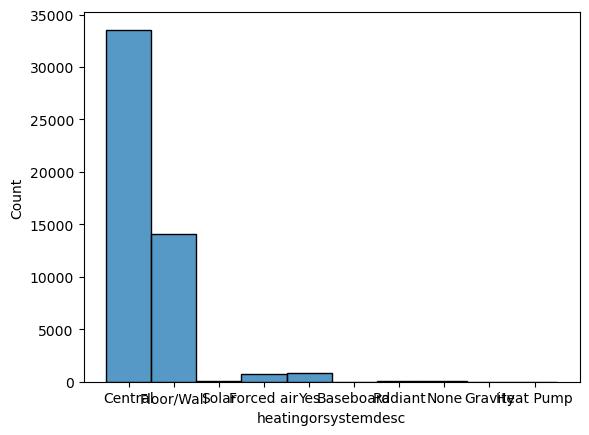

propertylandusedesc


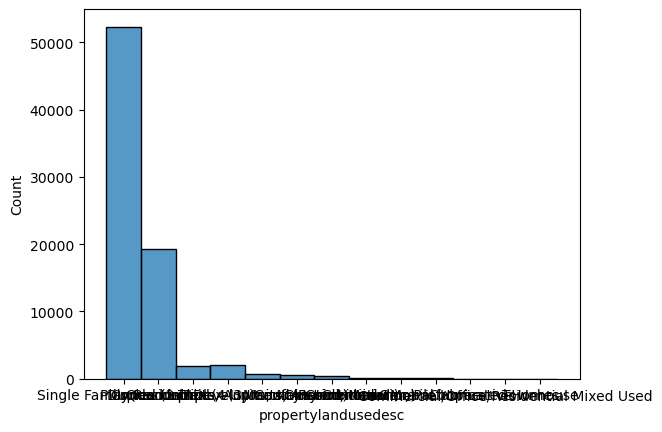

storydesc


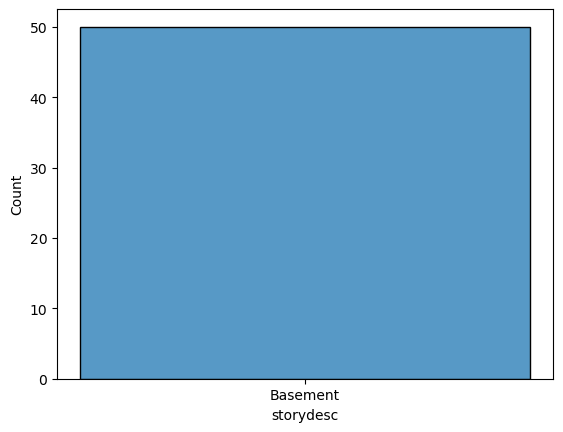

typeconstructiondesc


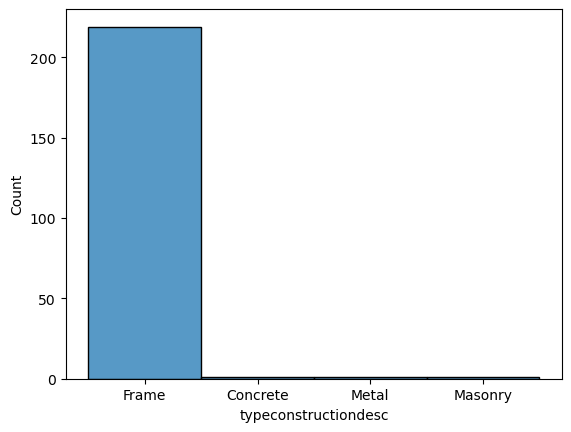

In [10]:
for col in zillow:
    print(col)
    sns.histplot(x=zillow[col], data=zillow)
    plt.show()

# missing values
Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.



In [11]:
sum(zillow['yearbuilt'].isnull())

263

In [12]:
len(zillow['yearbuilt'])

77381

In [13]:
sum(zillow['yearbuilt'].isnull())/len(zillow['yearbuilt'])


0.003398767139220222

In [14]:
def missing_nulls(df):
    a=[]
    b=[]
    c=[]
    e= {'num_rows_missing': a, 'pct_rows_missing': b}
    for col in df:
        c.append(col)
        nulls= sum(df[col].isnull())
        a.append(nulls)
        b.append(nulls/len(df[col]))
        d= pd.DataFrame(index=c, data=e)
    return d
    

In [15]:
z=missing_nulls(zillow)
z

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
typeconstructiontypeid,77159,0.997131
storytypeid,77331,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361083
buildingclasstypeid,77366,0.999806
architecturalstyletypeid,77175,0.997338
airconditioningtypeid,52428,0.677531
id,0,0.000000
basementsqft,77331,0.999354


# Prepare
Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.



In [16]:
zillow['propertylandusedesc'].value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [17]:
zillow=(
    zillow[(zillow['propertylandusetypeid'] != 246) &
           (zillow['propertylandusetypeid'] != 247) &
           (zillow['propertylandusetypeid'] != 248) &
           (zillow['propertylandusetypeid'] != 265) &
           (zillow['propertylandusetypeid'] != 267) &
           (zillow['propertylandusetypeid'] != 31) & 
           (zillow['propertylandusetypeid'] != 264) &
           ((zillow['propertylandusetypeid'] != 266))]
)

In [18]:
zillow['propertylandusedesc'].value_counts()

Single Family Residential                     52320
Planned Unit Development                       1944
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Name: propertylandusedesc, dtype: int64

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).



In [19]:
def handle_missing_values(df, prop_req_column, prop_req_row):
    drop_col= len(df)* prop_req_column
    df= df.dropna(axis=1, thresh= drop_col)
    drop_row= len(df.columns)* prop_req_row
    df= df.dropna(axis=0, thresh=drop_row)
    return df

In [20]:
test=handle_missing_values(zillow, .6, .75)
test

,parcelid,propertylandusetypeid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
77578,12826780,261.0,2.0,1187175,2.0,3.0,6.0,2.0,1762.0,1762.0,...,522000.0,2016.0,382000.0,6317.15,6.037503e+13,77612,0.007204,2017-09-25,Central,Single Family Residential
77577,12773139,261.0,2.0,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Central,Single Family Residential
77576,17239384,261.0,NaN,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,NaN,Single Family Residential
77575,11000655,261.0,2.0,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Central,Single Family Residential
77394,11388980,261.0,7.0,1017567,2.0,3.0,6.0,2.0,1518.0,1518.0,...,229242.0,2016.0,112345.0,3277.29,6.037703e+13,77428,0.023168,2017-09-19,Floor/Wall,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,12069064,261.0,NaN,870991,1.0,2.0,5.0,1.0,738.0,738.0,...,218552.0,2016.0,199662.0,2366.08,6.037302e+13,7,0.101723,2017-01-01,NaN,Single Family Residential
6,12095076,261.0,2.0,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Central,Single Family Residential
3,12177905,261.0,2.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
2,14186244,261.0,NaN,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,NaN,Single Family Residential


In [21]:
zillow.shape

(54433, 69)

# Mall Customers
Acquire data from the customers table in the mall_customers database.


In [26]:
def wrangle_mall_customers():
    '''
    looking for an already existing mall_customers csv on the local machine
    '''
    if os.path.isfile('mall_customers.csv'):
        return pd.read_csv('mall_customers.csv')
    else:
        '''
        if there is no existing csv, then connect to the SQL server and get the information from 
        mall_customers db
        '''
        url = get_connection('mall_customers')
        '''
        query for sql
        '''
        query = '''
                SELECT *
                FROM customers;
                '''
        
        df = pd.read_sql(query, url)
        '''
        saving the newly queried SQL table to a csv so it
        can be used instead of connecting to the SQL server
        every time I want this info
        '''
        df.to_csv('mall_customers.csv', index=False)
        return df

In [27]:
mc=wrangle_mall_customers()

In [28]:
mc.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Summarize the data (include distributions and descriptive statistics).


In [30]:
mc.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


customer_id


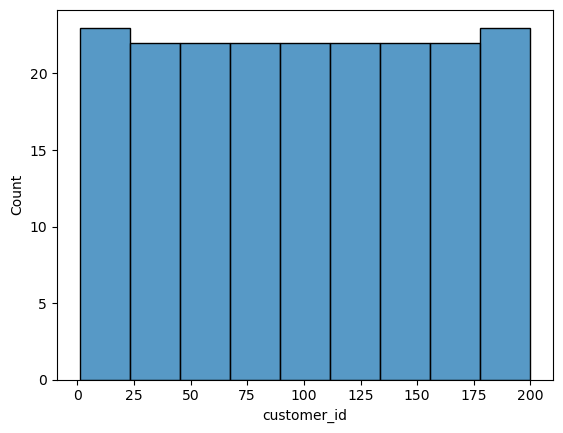

gender


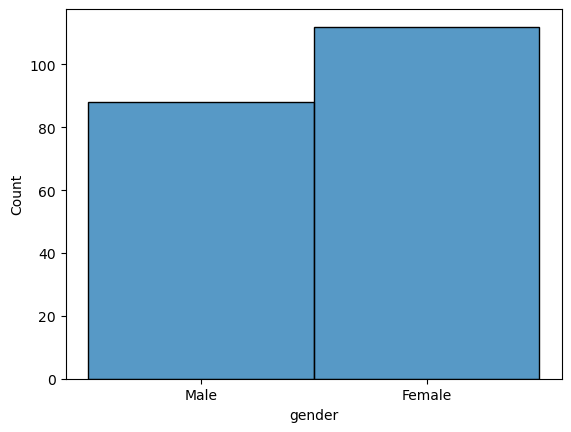

age


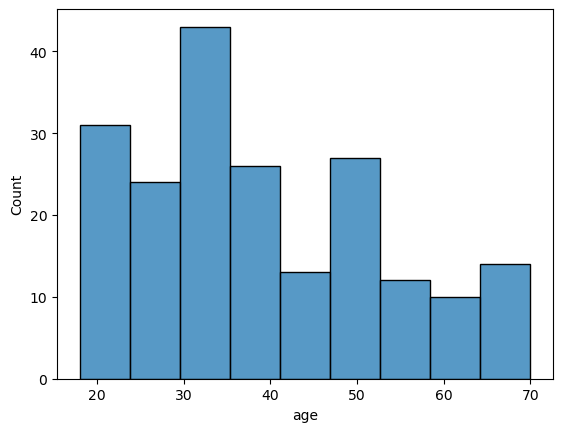

annual_income


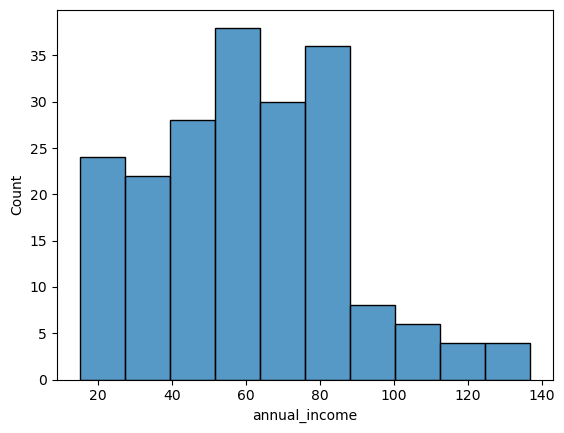

spending_score


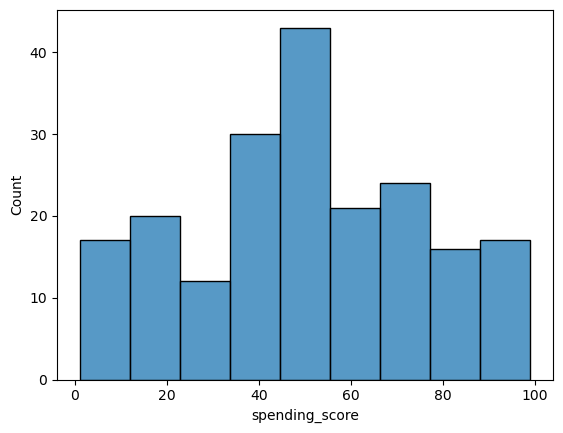

In [34]:
for col in mc:
    print(col)
    sns.histplot(x=mc[col], data=mc)
    plt.show()

# Detect outliers using IQR.


In [37]:
def remove_outliers(df, k=1.5, number=8):
    a=[]
    b=[]
    fences=[a, b]
    features= []
    col_list = []
    i=0
    for col in df:
        new_df=np.where(df[col].nunique()>number, True, False)
        if new_df==True:
            if df[col].dtype == 'float' or df[col].dtype == 'int':
                '''
                for each feature find the first and third quartile
                '''
                q1, q3 = df[col].quantile([.25, .75])
                '''
                calculate inter quartile range
                '''
                iqr = q3 - q1
                '''
                calculate the upper and lower fence
                '''
                upper_fence = q3 + (k * iqr)
                lower_fence = q1 - (k * iqr)
                '''
                appending the upper and lower fences to lists
                '''
                a.append(upper_fence)
                b.append(lower_fence)
                '''
                appending the feature names to a list
                '''
                features.append(col)
                '''
                assigning the fences and feature names to a dataframe
                '''
                var_fences= pd.DataFrame(fences, columns=features, index=['upper_fence', 'lower_fence'])
                col_list.append(col)
            else:
                print(col)
                print('column is not a float or int')
        else:
            print(f'{col} column ignored')
                                    
    for col in col_list:
        '''
        reassigns the dataframe to only include values withing the upper and lower fences/drop outliers
        '''
        df = df[(df[col]<= a[i]) & (df[col]>= b[i])]
        i+=1
    return df, var_fences

In [38]:
mc, fences=remove_outliers(mc)

gender column ignored


In [39]:
fences

,customer_id,age,annual_income,spending_score
upper_fence,296.5,80.125,133.625,129.375
lower_fence,-97.5,-2.875,-15.375,-21.625


In [42]:
def tts(df, stratify=None):
    '''
    removing your test data from the data
    '''
    train_validate, test=train_test_split(df, 
                                 train_size=.8, 
                                 random_state=8675309,
                                 stratify=None)
    '''
    splitting the remaining data into the train and validate groups
    '''            
    train, validate =train_test_split(train_validate, 
                                      test_size=.3, 
                                      random_state=8675309,
                                      stratify=None)
    return train, validate, test

In [44]:
train, val, test=tts(mc)

# Encode categorical columns using a one hot encoder (pd.get_dummies).


In [47]:
train=pd.get_dummies(train, columns=['gender'])

In [48]:
train.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
177,178,27,88,69,0,1
4,5,31,17,40,1,0
89,90,50,58,46,1,0
168,169,36,87,27,1,0
96,97,47,60,47,1,0


# Handle missing values.


In [50]:
train= handle_missing_values(train, .6, .75)

In [52]:
train.describe()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,100.318182,39.709091,60.263636,52.381818,0.590909,0.409091
std,56.751015,14.482730,25.095296,24.743448,0.493916,0.493916
min,1.000000,18.000000,15.000000,3.000000,0.000000,0.000000
25%,51.500000,29.000000,40.750000,36.000000,0.000000,0.000000
50%,101.500000,36.000000,61.500000,50.500000,1.000000,0.000000
75%,146.750000,50.000000,77.000000,73.750000,1.000000,1.000000
max,198.000000,70.000000,126.000000,98.000000,1.000000,1.000000


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 177 to 33
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     110 non-null    int64
 1   age             110 non-null    int64
 2   annual_income   110 non-null    int64
 3   spending_score  110 non-null    int64
 4   gender_Female   110 non-null    uint8
 5   gender_Male     110 non-null    uint8
dtypes: int64(4), uint8(2)
memory usage: 4.5 KB


In [55]:
train=train.set_index('customer_id')

In [56]:
train.head()

,age,annual_income,spending_score,gender_Female,gender_Male
customer_id,,,,,
178,27,88,69,0,1
5,31,17,40,1,0
90,50,58,46,1,0
169,36,87,27,1,0
97,47,60,47,1,0


# Scaling

In [57]:
import sklearn.preprocessing

ss=sklearn.preprocessing.StandardScaler()
num_cols=['age', 'annual_income']
ss.fit(train[num_cols])
train[num_cols]=ss.transform(train[num_cols])

In [58]:
train.head()

,age,annual_income,spending_score,gender_Female,gender_Male
customer_id,,,,,
178,-0.881550,1.110300,0.674693,0,1
5,-0.604095,-1.731864,-0.502698,1,0
90,0.713816,-0.090614,-0.259100,1,0
169,-0.257277,1.070269,-1.030494,1,0
97,0.505725,-0.010553,-0.218500,1,0
